# Аналіз датасету c Kaggle.com

[датасет](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

In [453]:
import numpy as np
import pandas as pd

In [454]:
# Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers with categories.csv')

In [455]:
# Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [456]:
# Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

**Відповідь**: Про скільки книг зберігає дані датасет? $\color{red}{550}$

In [457]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

## $\color{blue}{Первинне \quad дослідження \quad даних}$

In [458]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Відповідь**: Чи є в якихось змінних пропуски? (Так / ні) $\color{red}{Ні}$

In [459]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Відповідь:** Які є унікальні жанри? $\color{red}{Non Fiction, \ Fiction}$

<Axes: ylabel='Frequency'>

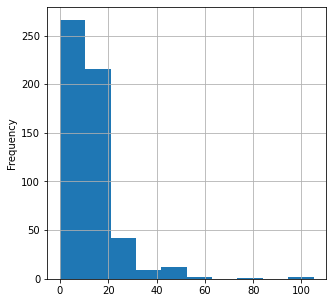

In [460]:
# Подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df.price.plot(kind='hist', figsize=(5,5), grid=True)

In [461]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max = df.price.max()
min = df.price.min()
mean = df.price.mean()
median = df.price.median()
max, min, mean, median

(105, 0, 13.1, 11.0)

**Відповідь:** Максимальна ціна? $\color{red}{105}$

**Відповідь:** Мінімальна ціна? $\color{red}{0}$

**Відповідь:** Середня ціна? $\color{red}{13.1}$

**Відповідь:** Медіанна ціна? $\color{red}{11}$

## $\color{blue}{Пошук \quad та \quad сортування \quad даних}$

**Відповідь:** Який рейтинг у датасеті найвищий? Відповідь: $\color{red}{4.9}$

In [462]:
df.user_rating.max()

4.9

**Відповідь:** Скільки книг мають такий рейтинг? Відповідь: $\color{red}{52}$

In [463]:
df[df.user_rating == df.user_rating.max()]['name'].count()

52

**Відповідь:** Яка книга має найбільше відгуків? Відповідь: $\color{red}{Where \quad the \quad Crawdads \quad Sing}$

In [464]:
df[df.reviews == df.reviews.max()][['name']]

,name
534,Where the Crawdads Sing


**Відповідь:** З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: $\color{red}{Publication \quad Manual \quad of \quad the \quad American \quad Psychological \quad Association, \quad 6th \quad Edition}$

In [465]:
df2015 = df[df.year == 2015]
df2015[df2015.price == df2015.price.max()][['name']]

,name
277,Publication Manual of the American Psychologic...


**Відповідь:** Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: $\color{red}{20}$

In [466]:
df[(df.genre == 'Fiction') & (df.year == 2010)][['name']].count()

name    20
dtype: int64

**Відповідь:** Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: $\color{red}{1}$

In [467]:
df_rating = df[(df.year == 2010) | (df.year == 2011)]
df_rating[df_rating.user_rating.isin([4.9])][['name']].count()

name    1
dtype: int64

In [468]:
# Відсортуйте за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df[(df.year == 2015) & (df.price < 8)].sort_values(by=['price'])

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


**Відповідь:** Яка книга остання у відсортованому списку? Відповідь: $\color{red}{Old \quad School \quad (Diary \quadf \quad \quad a \quad Wimpy \quad Kid \quad \#10)}$

In [469]:
df[(df.year == 2015) & (df.price < 8)].sort_values(by=['price']).tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


## $\color{blue}{Агрегування \quad даних \quad та \quad з`єднання \quad таблиць}$

In [470]:
# Давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, 
# для підрахунку мінімальних та максимальних значень використовуйте max та min). 
# Не беріть усі стовпці, виберіть тільки потрібні вам
df.groupby(['genre'])[['price']].agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

**Відповідь:** Максимальна ціна для жанру Fiction: Відповідь $\color{red}{82}$

**Відповідь:** Мінімальна ціна для жанру Fiction: Відповідь $\color{red}{0}$

**Відповідь:** Максимальна ціна для жанру Non Fiction: Відповідь $\color{red}{105}$

**Відповідь:** Мінімальна ціна для жанру Non Fiction: Відповідь $\color{red}{0}$

In [471]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, 
# для підрахунку кількості використовуйте count). 
# Не беріть усі стовпці, виберете тільки потрібні
df_author = df[['author', 'name']].groupby(['author']).agg({'name': 'count'})
df_author.columns = ['books']
df_author

,books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


**Відповідь:** Якої розмірності вийшла таблиця? Відповідь: $\color{red}{248 \quad rows × 1 \quad columns}$

In [472]:
df_author.shape

(248, 1)

**Відповідь:** Який автор має найбільше книг? Відповідь: $\color{red}{Jeff \quad Kinney}$

**Відповідь:** Скільки книг цього автора? Відповідь: $\color{red}{12}$

In [473]:
df_author[df_author['books'] == df_author['books'].max()]

,books
author,
Jeff Kinney,12


In [474]:
# Створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 
df_rating = df[['author', 'user_rating']].groupby(['author']).agg({'user_rating': 'mean'})
df_rating.columns = ['rating']
df_rating

,rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


**Відповідь:** У якого автора середній рейтинг мінімальний? Відповідь: $\color{red}{Donna \quad Tartt}$

**Відповідь:** Який у цього автора середній рейтинг? Відповідь: $\color{red}{3.9}$

In [475]:
df_rating[df_rating['rating'] == df_rating['rating'].min()]

,rating
author,
Donna Tartt,3.9


In [476]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df_result = pd.concat([df_author, df_rating], axis=1)
df_result

,books,rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [477]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df_result.sort_values(['books', 'rating'])

,books,rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


**Відповідь:** Який автор перший у списку? $\color{red}{Muriel \quad Barbery}$